In [11]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from python.utils import utils

data, time = utils.load_decim_data_helper("data/", "brake-test-bolt-config-1.h5")


data = data[:,:].transpose()
data.shape

(531920, 42)

In [3]:
# Import modules

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import signal
import matplotlib.pyplot as plt
import PyOMA as oma

# ======== PRE-PROCESSING =====================================================
# To open a .txt file create a variable containing the path to the file
# _file = "./test.txt" # Path to the txt file

# # open the file with pandas and create a dataframe
# # N.B. whatchout for header, separator and remove time column if present
# data = pd.read_csv(_file, header=0, sep="\t", index_col=False) 
# data = data.to_numpy()

# to retrieve the example data 
# data, (fex, FI_ex, xi_ex) = oma.Exdata()

In [14]:
# Sampling frequency
fs = 100 # [Hz] Sampling Frequency

# Using SciPy's signal module we can pre-process our data e.g. performing
# decimation, trend removal and filtering. 
# Detrend and decimate
data = signal.detrend(data, axis=0) # Trend rmoval
# q = 5 # Decimation factor
# data = signal.decimate(data,  q, ftype='fir', axis=0) # Decimation
# fs = fs/q # [Hz] Decimated sampling frequency

# Filter
_b, _a = signal.butter(12, (0.3,6.5), fs=fs, btype='bandpass')
filtdata = signal.filtfilt(_b, _a, data,axis=0) # filtered data

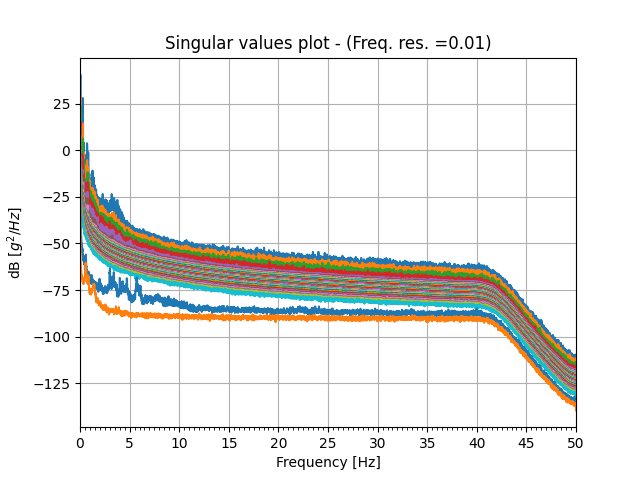

In [15]:
# Run FDD

FDD = oma.FDDsvp(data,  fs)

In [17]:

# Define list/array with the peaks identified from the plot

FreQ = [0.5, 3.5, 4.1, 5.27, 6] # identified peaks


In [22]:

# Extract the modal properties 
Res_FDD = oma.FDDmodEX(FreQ, FDD[1]) # extracting modal properties using standard FDD
# Res_EFDD = oma.EFDDmodEX(FreQ, FDD[1], method='EFDD') # " " " " Enhanced-FDD
# Res_FSDD = oma.EFDDmodEX(FreQ, FDD[1], method='FSDD', npmax = 35, MAClim=0.95, plot=True) # " " " " FSDD with additional input parameters


In [23]:
print('Frequencies: ', Res_FDD['Frequencies'])

Frequencies:  [0.48 3.49 4.08 5.26 6.  ]


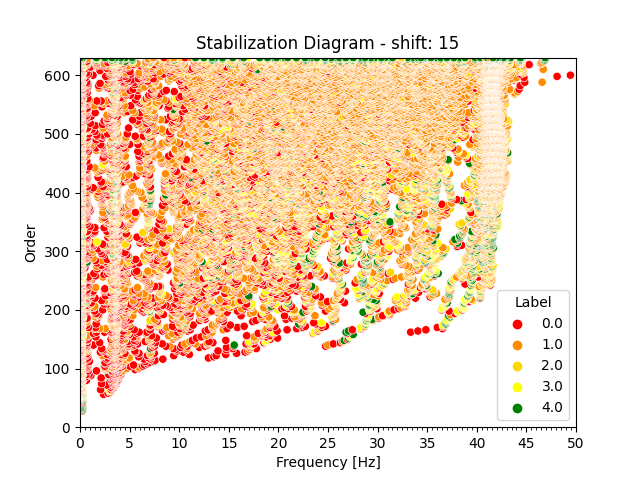

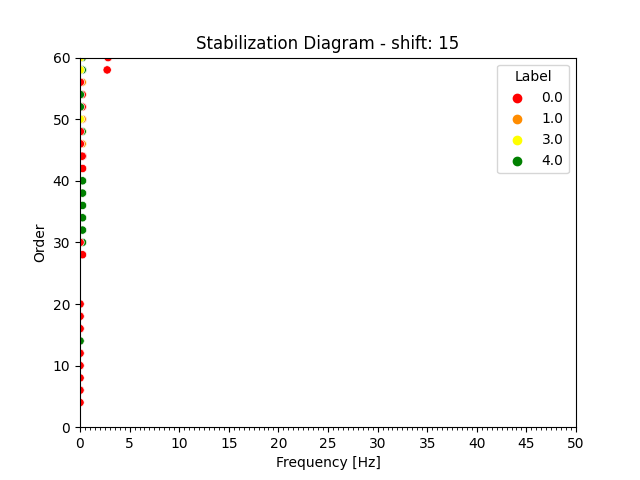

In [19]:
# Run SSI
br = 15
SSIcov= oma.SSIcovStaDiag(data, fs, br) # running SSI-cov
SSIdat = oma.SSIdatStaDiag(data, fs, br, ordmax=60, lim=(0.01, 0.05, 0.02, 0.1)) # running SSI-dat with additional input parameters

In [20]:
# Extract the modal properties
Res_SSIcov = oma.SSIModEX(FreQ, SSIcov[1]) # extracting modal properties
# Res_SSIdat= oma.SSIModEX(FreQ, SSIdat[1]) # extracting modal properties

In [21]:
print('Frequencies: ', Res_SSIcov['Frequencies'])
print('Damping: ', Res_SSIcov['Damping'])
# print('Mode Shapes: ', Res_SSIcov['Mode Shapes'])

Frequencies:  [0.5053278  3.47239441 4.08588672 5.27351125 6.03399426]
Damping:  [0.09294641 0.06096877 0.09269144 0.0884751  0.04473258]
